# HOMEWORK 2
## JUAN FRANCISCO CISNEROS

### 1. Implement the class `Stacks` and all its methods using singly linked lists. Analyze the runtime and memory complexity, and compare with what we studied in class


##### 1.LETS USE THE CLASS IMPLEMENTATION FOR NODE AND SINGLE LIKED LIST

In [78]:
import ctypes
import math
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None): #CONSTANT
        self.val = val
        self.next_node = None

    def set_next_node(self, next_node): #CONSTANT
        self.next_node = next_node


###### THE CLASS NODE IS CONSTANT O(1)

In [79]:
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None): #CONSTANT
        self.head_node = head_node

    def list_traversed(self):
        node = self.head_node
        while node:
            try:
                print(node.val)
                node = node.next_node
            except:
                print()

    def insert_head(self, new_node): #CONSTANT
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null
        new_node.set_next_node(self.head_node)
        self.head_node = new_node

    def insert_tail(self, new_node):
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)

    def insert_middle(self, new_node, value):
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        while node.val != value:
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete(self,value): #O(n)
        node = self.head_node
        prev = None

        if node.val == value:
            self.head_node = self.head_node.next_node
            node.set_next_node(None)
            return node.val


        while node and node.val != value:
            prev = node
            if node.next_node != None:
                node = node.next_node
        if node:
            prev.set_next_node(node.next_node)
            node.set_next_node(None)
        else:
            raise ValueError('No value founded')

###### THE CLASS SINGLE LINKED LIST IS LINEAR O(n)

##### 2.LETS IMPLEMENT STACKS USING SINGLE LINKED LISTS

In [40]:
class Stack(object):
    """
    Implementation of the stack data structure
    """

    def __init__(self, n): #O(n)
        self.l = 0 #CONSTANT
        self.n = n #CONSTANT
        self.stack = self._create_stack() #CONSTANT


    def _create_stack(self): #CONSTANT
        """
        Creates a new stack of capacity n
        """
        return Singly_linked_list() #CONSTANT


    def push(self, item):#CONSTANT
        """
        Add new item to the stack
        """
        if self.l == self.n: #CONSTANT
            raise ValueError("no more capacity")
        self.stack.insert_head(Node(item)) #CONSTANT
        self.l += 1 #CONSTANT

    def pop(self): #O(n)
        """
        Remove an element from the stack
        """
        if not self.l: #CONSTANT
            raise('stack is empty')
        p = self.stack.delete(self.stack.head_node.val) #O(n)
        self.l -= 1 #CONSTANT
        return p



    def size(self): #CONSTANT
        """
        Return size of the stack
        """
        return self.l

    def top(self): #CONSTANT
        """
        Show the top element of the stack
        """
        return self.stack.head_node.val

    def full(self): #CONSTANT
        """
        Is the stack full?
        """
        return self.l == self.n

    def empty(self): #CONSTANT
        """
        Is the stack empty?
        """
        return self.l == 0






###### THE CLASS STACK IS LINEAR O(n), IF WE COMPARED IT TO THE CLASS STACK IMPLEMENTED IN CLASS WE CAN SAY THAT MY ALGORITHM IS WORST BECAUSE THE ONE WE SAW IN CLASS IS 0(1). THE FUNCTION POP() IN MY CASE IS OF TYPE O(n) WHILE EVERY FUNCTION IN THE CLASS WE IMPLEMENTED AT CLASS IS O(1)

In [41]:
S = Stack(10)
S.push("a")
S.push("b")
S.push("c")
S.push("d")
S.size()

4

In [42]:
S.pop()

'd'

In [43]:
S.size()

3

In [44]:
S.top()

'c'

In [45]:
S.full()

False

In [46]:
S.empty()

False

### 2. Write a method part of the linked list class that will reverse the linked list. Your implementation should visit each node in the list only one time, and should use $O(1)$ of extra memory.


> For example, if the list is:

> A -> B -> C -> D -> null

> The method must return:

> D -> C -> B -> A -> null



##### 1.LETS USE THE CLASS IMPLEMENTATION FOR NODE AND SINGLE LIKED LIST
##### 2. LETS IMPLEMENT THE REVERSE LIST FUNCTION

In [47]:
class Singly_linked_list(Singly_linked_list):

    def reverse_list(self):
        prev = None
        now = self.head_node
        while(now is not None):
            next = now.next_node
            now.next_node = prev
            prev = now
            now = next
        self.head_node = prev



In [48]:
m1 = Node("Jan")
m2 = Node("Feb")
m3 = Node("March")
m1.set_next_node(m2)
m2.set_next_node(m3)
list1 = Singly_linked_list(m1)
list1.list_traversed()

Jan
Feb
March


In [49]:
list1.reverse_list()
list1.list_traversed()

March
Feb
Jan


### 3. Implement the class Queue using stacks.

> a. Analyze the runtime and memory complexity, and compare with what we implemented in class.

> b. Implement a few test cases that would allow you to measure the difference in runtime of the `dequeue` method. (Hint: what is the worst case, so that dequeue of the stack implementation is greater than the implementation we did in class?)

##### 1.LETS USE THE CLASS IMPLEMENTATION FOR STACKS

In [81]:
import ctypes
class Stack(object):
    """
    Implementation of the stack data structure
    """

    def __init__(self, n): #O(1)
        self.l = 0
        self.n = n
        self.stack = self._create_stack(self.n)

    def _create_stack(self, n): #O(1)
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()

    def push(self, item): #O(1)
        """
        Add new item to the stack
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.stack[self.l] = item
        self.l += 1

    def pop(self): #O(1)
        """
        Remove an element from the stack
        """
        # self.l = 0
        # 0 is equivalent to False
        # any number != 0 is True
        if not self.l:
            raise('stack is empty')
        c = self.stack[self.l-1]
        self.stack[self.l] = ctypes.py_object
        self.l -= 1
        return c

    def top(self): #O(1)
        """
        Show the top element of the stack
        """
        return self.stack[self.l-1]

    def full(self): #O(1)
        """
        Is the stack full?
        """
        return self.l == self.n
        # if self.l == self.n:
        #    return True
        # return False

    def empty(self):#O(1)
        """
        Is the stack empty?
        """
        return self.l == 0
        #if self.l == 0:
        #    return True
        #return False

    def size(self):#O(1)
        """
        Return size of the stack
        """
        return self.l




##### THE CLASS STACKS IMPLEMENTED IN CLASS IS LINEAR O(1)

###### 2.LETS IMPLEMENT QUEUE


In [51]:
import ctypes
class Queue(object):
    """
    Implementation of the queue data structure
    """
    def __init__(self, n): #O(1)
        self.l = 0 #O(1)
        self.n = n #O(1)
        self.queue = self._create_queue(self.n) #O(1)

    def _create_queue(self, n):
        """
        Creates a new stack of capacity n
        """
        return Stack(n) #O(1)

    def enqueue(self, item): #O(1)
        """
        Add new item to the queue
        """
        if self.l == self.n: #O(1)
            raise ValueError("no more capacity")
        self.queue.push(item) #O(1)
        self.l += 1 #O(1)

    def dequeue(self): #O(1)
        """
        Remove an element from the queue
        """
        self.l -= 1 #O(1)
        return self.queue.pop() #O(1)


    def first(self): #O(1)
        """
        Show the first element of the queue
        """
        return self.queue.top()  #O(1)

    def full(self): #O(1)
        """
        Is the queue full?
        """
        if self.l == self.n: #O(1)
            return True
        return False

    def empty(self): #O(1)
        """
        Is the queue empty?
        """
        if self.l == 0: #O(1)
            return True
        return False

    def size(self): #O(1)
        """
        Return size of the queue
        """
        return self.l #O(1)




##### MY CLASS STACKS IS CONSTANT O(1), EVERY FUNCTION HAS A MAX RUNTIME OF O(1) WHILE THE ONE WE IMPLEMENTED IN CLASS IS WORST PERFORMING, THE FUNCTION DEQUEUE IS O(n) WHILE MY CLASS RUNS THE ALGORITHM IN RUNTIME O(1)

In [82]:
q = Queue(10)
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)

In [83]:
q.size()

3

In [84]:
q.dequeue()

3

In [85]:
q.first()

2

In [86]:
q.empty()

False

In [87]:
q.full()

False

### 4. Complete the PriorityQueue class, so that when we call `dequeue`, the element with the highest priority will be returned. Analyze the complexity of runtime and memory of the `enqueue` and `dequeue` methods.

In [58]:
import ctypes
class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """

    def __init__(self, n): #CONSTANT
        self.l = 0 #CONSTANT
        self.n = n #CONSTANT
        self.queue = self._create_queue(self.n) #CONSTANT

    def _create_queue(self, n): #CONSTANT
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)() #CONSTANT

    def enqueue(self, item): #CONSTANT
        """
        Add new item to the queue
        """
        if self.l == self.n: #CONSTANT
            raise ValueError("no more capacity")
        self.queue[self.l] = item #CONSTANT
        self.l += 1 #CONSTANT



    def insertionSort(self): #O(N^2)

        """
        Delete item with the highest priority
        """

        a = self.queue
        for i in range(1, len(a)): #N VECES
            try:
                key = a[i] # N VECES
                j = i-1 #N VECES
                while j >=0 and key < a[j] : #N VECES
                        a[j+1] = a[j]  #N VECES
                        j -= 1  #N VECES
                a[j+1] = key  #N VECES
            except:
                continue


        sortedList = [] #CONSTANTE



        for j in range(len(a)): #N VECES
            try:
                sortedList.append(a[j]) #N VECES
            except:
                continue
        self.queue = sortedList
        return self.queue


    def dequeue(self): #O(n^2)
        """
        Delete item with the highest priority
        """
        self.insertionSort() # SORTING ITEMS BEFORE DEQUEUE O(n^2)
        priority = self.queue[self.size()-1] #CONSTANT
        newQueue = [] #CONSTANT
        for i in range(self.size()-1): #O(n)
            newQueue.append(self.queue[i])
        self.queue = newQueue #CONSTANT
        self.l -=1 #CONSTANT
        return priority


    def size(self):  #CONSTANT
        """
        Return size of the queue
        """
        return self.l #CONSTANT







##### FOR THE PRIORITY QUEUE THE MEMORY COMPLEXITY FOR BOTH ENQUEUE AND DEQUEUE IS CONSTANT O(1) WHILE THE ALGORITHM COMPLEXITY IS O(N^2), THE DEQUEUE METHOD NEEDS TO USE ANOTHER ALGORITHM TO SORT THE LIST BEFORE DELETING THE ITEM WITH THE HIGHEST PRIORITY, I USED THE INSERTION SORT ALGORITHM THAT HAS A COMPLEXITY OF $O(n^2)$

In [88]:
S = PriorityQueue(10)
S.enqueue(1)
S.enqueue(5)
S.enqueue(8)
S.enqueue(3)
S.enqueue(4)


S.size()

5

In [89]:
S.insertionSort()

[1, 3, 4, 5, 8]

In [90]:
S.dequeue()

8

In [91]:
S.size()

4

In [92]:
S.insertionSort()

[1, 3, 4, 5]

### 5. A given linked-list (singly or doubly) represents an integer number. For example, 345 is represented by the singly-linked list 3 -> 4 ->5. Write a Python program that does the following:

1. Receives three integers A, B and C as inputs. Assume that the three number have the same number of digits.

2. Transform the numbers to their corresponding linked lists

3. Implement the sum of the three numbers. The result A + B + C must be stored in a linked list.

4. Print the result by traversing the list.

5. Run your program for numbers with 1 to 100 digits, and capture the runtime. Use these number to estimate the complexity of the runtime.
    - Hint: write a small function that uses `randint()` to generate a number of a given number of digits
6. Analitically estimate the runtime complexity and compare with the one obtained in (5).

In [93]:
from time import time

#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        return t2-t1
    return wrap_func

In [94]:
def numbers(A,B,C):

    listA = Singly_linked_list(Node(str(A)[0]))
    listB = Singly_linked_list(Node(str(B)[0]))
    listC = Singly_linked_list(Node(str(C)[0]))
    size = 0
    for i in str(A):
        try:
            size+=1
            listA.insert_tail(Node(str(A)[size]))
            listB.insert_tail(Node(str(B)[size]))
            listC.insert_tail(Node(str(C)[size]))
        except:
            print(listA.list_traversed())
            print(listB.list_traversed())
            print(listC.list_traversed())

    sum = A+B+C
    nodeSum = []

    for j in str(sum):
        nodeSum.append(Node(j))
    for k in range(len(nodeSum)):
        if( k == len(nodeSum)-1):
            nodeSum[k].set_next_node(None)
            break
        nodeSum[k].set_next_node(nodeSum[k+1])
    listSum = Singly_linked_list(nodeSum[0])
    return listSum.list_traversed()

In [95]:
numbers(123,456,789)

1
2
3
None
4
5
6
None
7
8
9
None
1
3
6
8


In [96]:
@timer_func
def numbers(A,B,C):

    listA = Singly_linked_list(Node(str(A)[0]))
    listB = Singly_linked_list(Node(str(B)[0]))
    listC = Singly_linked_list(Node(str(C)[0]))
    size = 0
    for i in str(A):
        try:
            size+=1
            listA.insert_tail(Node(str(A)[size]))
            listB.insert_tail(Node(str(B)[size]))
            listC.insert_tail(Node(str(C)[size]))
        except:
            print(listA.list_traversed())
            print(listB.list_traversed())
            print(listC.list_traversed())

    sum = A+B+C
    nodeSum = []

    for j in str(sum):
        nodeSum.append(Node(j))
    for k in range(len(nodeSum)):
        if( k == len(nodeSum)-1):
            nodeSum[k].set_next_node(None)
            break
        nodeSum[k].set_next_node(nodeSum[k+1])
    listSum = Singly_linked_list(nodeSum[0])
    return listSum.list_traversed()


In [97]:
import random
def getNum ():
    return random.randint(1, int(math.pow(10,2)))

In [98]:
result = []
for f in range(1000):
    number = getNum()
    n = numbers(number,number,number)
    result.append(n)

In [99]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame(zip(result))#DEFINE THE DATA FRAME
df.columns = ['T(n)']
df

,T(n)
0,2097152.0
1,1048576.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
998,786432.0


<AxesSubplot: >

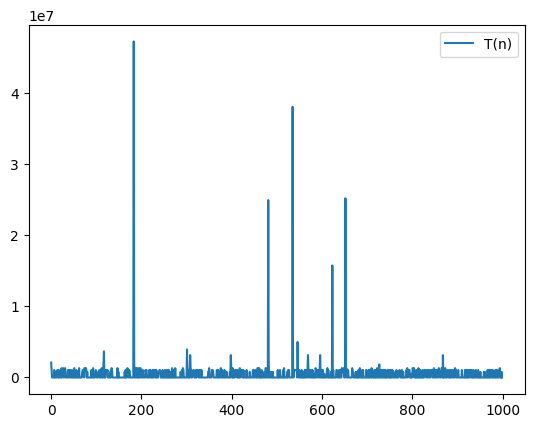

In [100]:
df.plot(y='T(n)')

##### IF WE ANALYZE THE ALGORITHM IMPLEMENTED, WE CAN SAY THAT THE RUNTIME COMPLEXITY IS LINEAR O(n). AS SHOWN IN THE GRAPH, WE CAN SAY THAT YES IT RUNS IN A LINEAR WAY.

In [72]:

   # for x in str(B):
    #    nodeB.append(Node(x))
    #for i in str(A):
     #   nodeA.append(Node(i))
    #for w in str(C):
     #   nodeC.append(Node(w))

    #for k in range(len(nodeA)):
     #   if( k == len(nodeA)-1):
      #      nodeA[k].set_next_node(None)
       #     nodeB[k].set_next_node(None)
        #    nodeC[k].set_next_node(None)
         #   break
        #nodeA[k].set_next_node(nodeA[k+1])
        #nodeB[k].set_next_node(nodeB[k+1])
        #nodeC[k].set_next_node(nodeC[k+1])

    #listA = Singly_linked_list(nodesA[0])
    #return listA.list_traversed()


    #listB = Singly_linked_list(nodeB[0])
    #print(listB.list_traversed())
    #listC = Singly_linked_list(nodeC[0])
    #print(listC.list_traversed())


    #print(listSum.list_traversed())



